In [2]:
import numpy as np
import pandas as pd
from env import user, password, host

In [3]:
def get_db_url(user,password,host,db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

url = get_db_url(user,password,host, "telco_churn")

In [16]:
churn_df = pd.read_sql('select * from customers', url)

<AxesSubplot:ylabel='churn'>

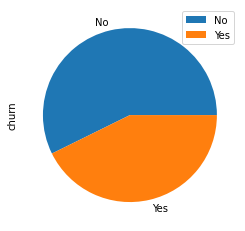

In [45]:
churn_df_copy = churn_df[churn_df["contract_type_id"]==1]
churn_group = churn_df_copy.groupby('churn').churn.count()
churn_group
churn_group.plot.pie(legend = True)

array([<AxesSubplot:ylabel='churn'>], dtype=object)

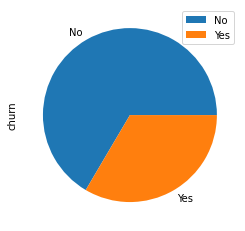

In [44]:
churn_group_pay = churn_df_copy[churn_df_copy['payment_type_id'] >2].groupby('churn').churn.count().plot.pie(legend = True)
churn_group_pay

In [47]:
churn_df_copy['total_charges'] = churn_df_copy["total_charges"].astype(float)

<ipython-input-47-5c32e2c3dd22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df_copy['total_charges'] = churn_df_copy["total_charges"].astype(float)


<AxesSubplot:xlabel='payment_type_id'>

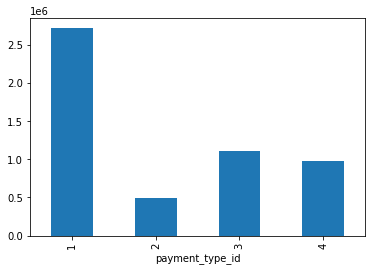

In [55]:
churn_df_copy.groupby('payment_type_id').total_charges.sum().plot.bar()